# DSCI 100 Group 19 Project Proposal

#### Group Members: Zaen Zhang(45365160), JayEsquivel(24946550), Sarah Wissmann(86897519), Ryan Chiu(15387816)

# Predicting crime rates in towns based on neighbourhood characteristics

## Introduction
The security and stability of our homes can have dramatic influences on our lives. It should therefore come as no surprise that violent crime is correlated with neighbourhood characteristics, such as segregation and social capital, according to Sackett (2016).

This led us to wonder whether it is possible to predict the level of crime in a town based on neighbourhood characteristics. From this, we developed our research question: are social factors (ie: lower status populations (LSTAT)), infrastructure (ie: accessibility to radial highways (RAD), and the number of non-retail businesses (INDUS), or government policies (ie: property tax rates (TAX)) most effective at predicting per capita crime rates in Boston? We chose a variety of neighbourhood characteristics to investigate if social factors, infrastructure, or legislative decisions are the most impactful on crime rates.

In order to test our research question, we will be using real-estate data collected from suburban towns in Boston.

## Preliminary exploratory data analysis

### Data Summary:

In [1]:
# Demonstration of loading data from Web URL
library(tidyverse)
library(RCurl)
library(tidymodels)
library(dplyr)
library(purrr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infe

In [2]:
# Read Data from a Github Repo where we put our data.csv file that was downloaded from Kaggle
url = "https://raw.githubusercontent.com/Zane-Z/DSCI-100-Group-Project/main/data.csv"
data = read_csv(url)
head(data)

Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),
  RAD = col_double(),
  TAX = col_double(),
  PTRATIO = col_double(),
  B = col_double(),
  LSTAT = col_double(),
  MEDV = col_double()
)



CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
# Seperating Training and Testing data, eliminating and testing NAs

set.seed(2000)
data <- na.omit(data)

apply(data, 2, function(x) any(is.na(x)))
      
data_split <- initial_split(data, prop = 0.75, strata = CRIM)
data_training <- training(data_split)
data_testing <- testing(data_split)


CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
PTRATIO       B   LSTAT    MEDV 
  FALSE   FALSE   FALSE   FALSE

In [4]:
# Data Summarization using both "summary" and our self-defined function
funs <- c(mean = mean, median = median, std = sd)
args <- list(na.rm = TRUE)
data_analysis <- data_training %>%
            select(CRIM, TAX, PTRATIO, B) %>%
              map_df(~ funs %>%
               map(exec, .x, !!!args), .id = "var")
data_analysis

summary(data_training)

var,mean,median,std
<chr>,<dbl>,<dbl>,<dbl>
CRIM,3.664138,0.266005,8.655084
TAX,408.774869,334.500000,167.864139
PTRATIO,18.422775,19.000000,2.285807
B,356.924084,390.925000,89.314230


      CRIM                ZN            INDUS            CHAS       
 Min.   : 0.00906   Min.   :  0.0   Min.   : 0.46   Min.   :0.0000  
 1st Qu.: 0.08210   1st Qu.:  0.0   1st Qu.: 5.19   1st Qu.:0.0000  
 Median : 0.26600   Median :  0.0   Median : 9.90   Median :0.0000  
 Mean   : 3.66414   Mean   : 10.8   Mean   :11.39   Mean   :0.0733  
 3rd Qu.: 3.67708   3rd Qu.: 12.5   3rd Qu.:18.10   3rd Qu.:0.0000  
 Max.   :88.97620   Max.   :100.0   Max.   :27.74   Max.   :1.0000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.137  
 1st Qu.:0.4530   1st Qu.:5.878   1st Qu.: 47.20   1st Qu.: 2.074  
 Median :0.5380   Median :6.210   Median : 77.50   Median : 2.975  
 Mean   :0.5585   Mean   :6.290   Mean   : 69.28   Mean   : 3.719  
 3rd Qu.:0.6292   3rd Qu.:6.619   3rd Qu.: 94.38   3rd Qu.: 5.118  
 Max.   :0.8710   Max.   :8.725   Max.   :100.00   Max.   :10.710  
      RAD              TAX           PTRA

### Data Visualization:

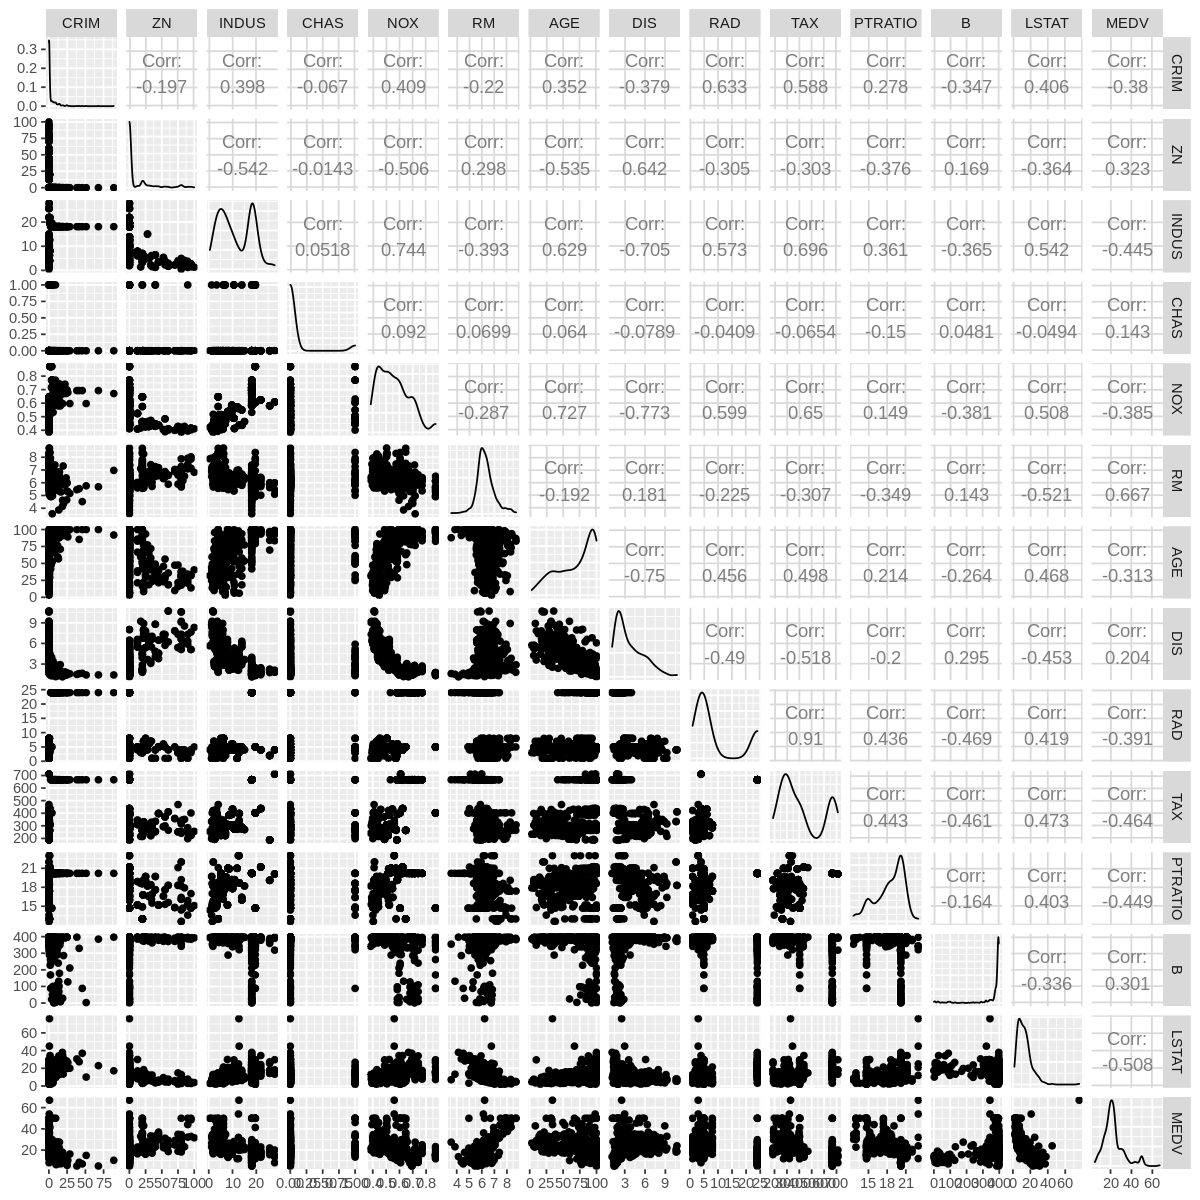

In [5]:
# We first use ggpairs() function to see and decide which features have the strongest 
# correlation with the prediciton CRIM, among which we chose the ones that would make 
# sense in real life. 

options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(data_training)

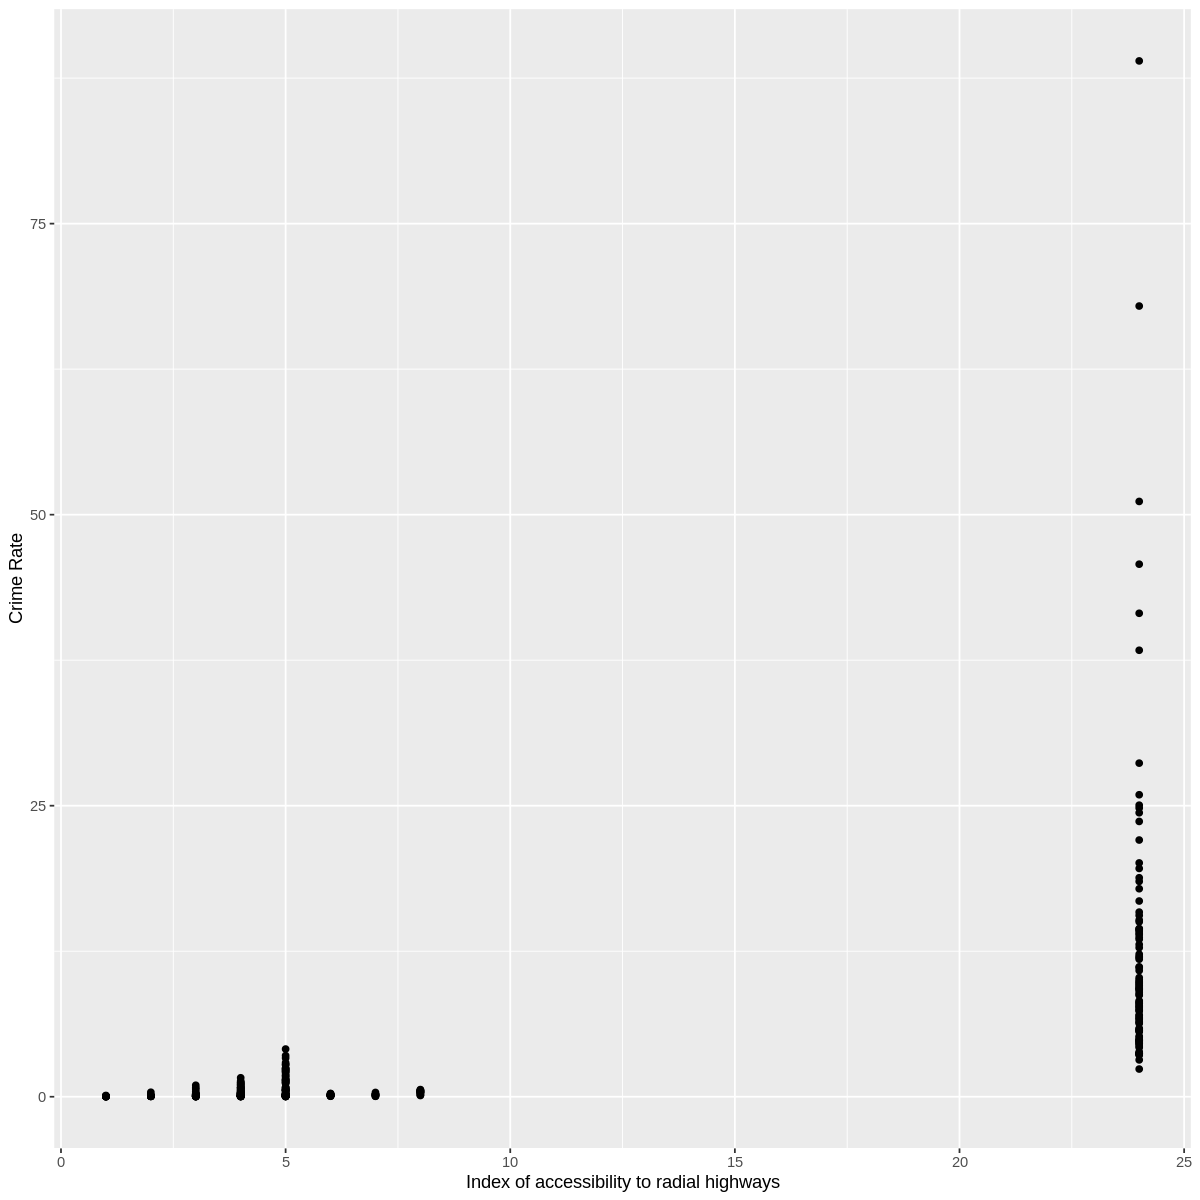

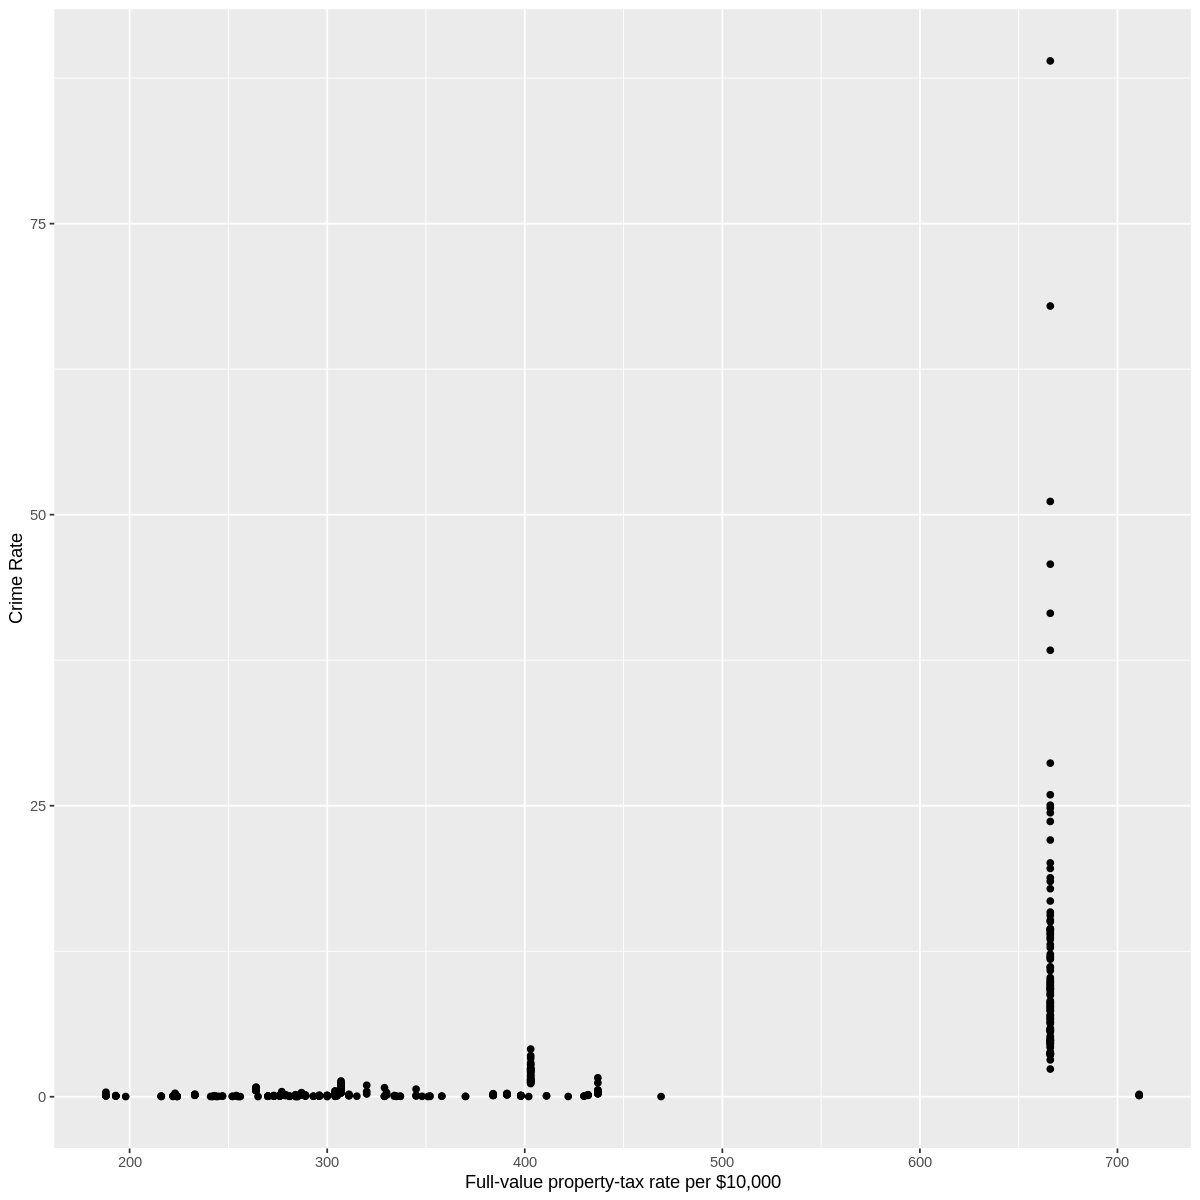

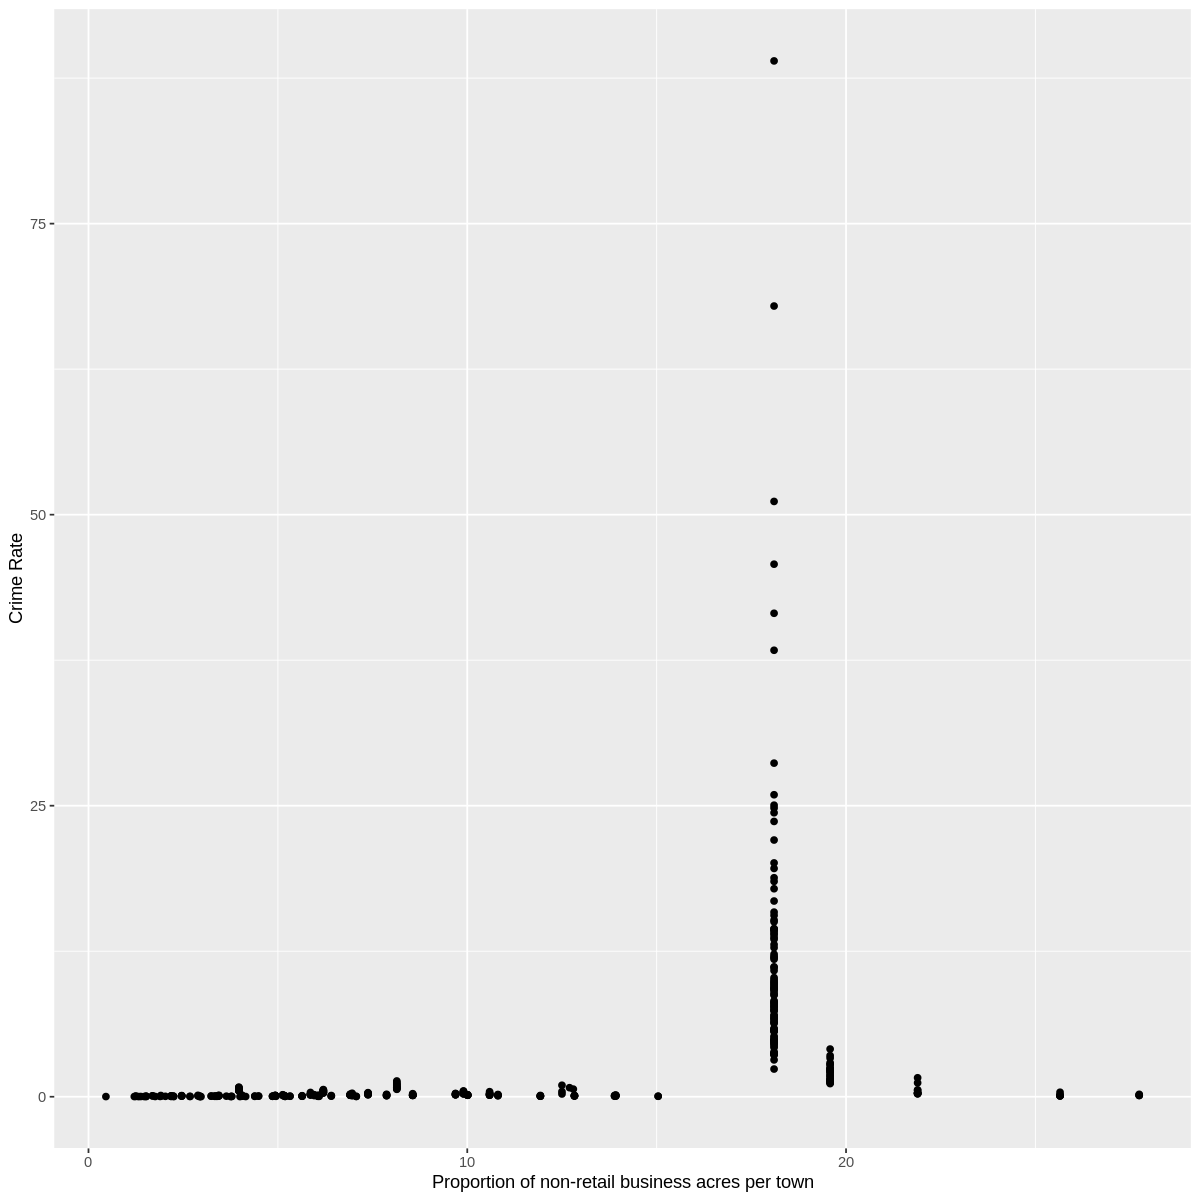

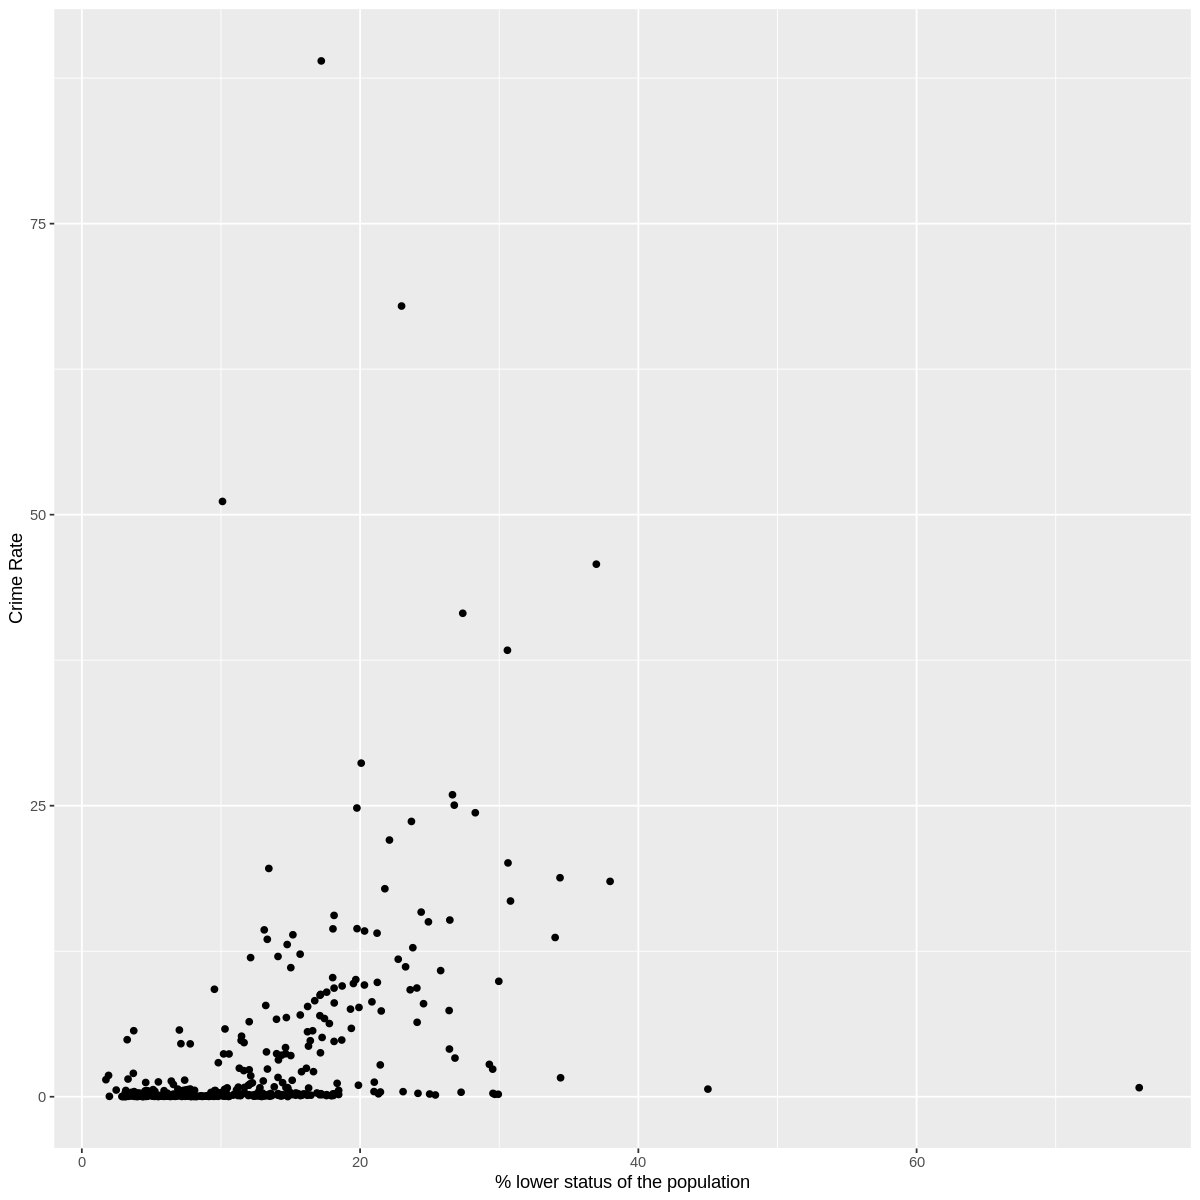

In [6]:
# We graphed the most suited predictors agianst CRIM to see how the data points distribuite

plot_rad <- ggplot(data_training, aes(x = RAD, y = CRIM)) +
  geom_point() + 
  xlab("Index of accessibility to radial highways") +
  ylab("Crime Rate")

plot_tax <- ggplot(data_training, aes(x = TAX, y = CRIM)) +
  geom_point() + 
  xlab("Full-value property-tax rate per $10,000") +
  ylab("Crime Rate")

plot_indus <- ggplot(data_training, aes(x = INDUS, y = CRIM)) +
  geom_point() + 
  xlab("Proportion of non-retail business acres per town") +
  ylab("Crime Rate")

plot_lstat <- ggplot(data_training, aes(x = LSTAT, y = CRIM)) +
  geom_point() + 
  xlab("% lower status of the population") +
  ylab("Crime Rate")

plot_rad
plot_tax
plot_indus
plot_lstat

## Methods
We have determined that we will encounter a standard amount of cleaning and data wrangling.

The variables with which we are going to use to predict the level of crime in the town is LSTAT, RAD, INDUS and TAX determined by the value of correlation to CRIM within the summary function. This project will help us visualise whether these socioeconomic and political factors has any effect on the capita crime rate by town (CRIM). In particular, we are using a real estate data set surveyed over the Boston suburban area by Dragon Real Estate.

After tidying up the original dataset, separate K-nearest neighbours (K-NN) regression analyses will be used to determine the relationship between the mentioned predictor variables and CRIM. To ensure a best-fit regression plot, a tuning model for the number of neighbours will be utilised to determine the best K value. Furthermore, the variables will be standardised if needed to account for differences in the range/units of variables. The resulting regression plots will be visualised in scatterplot form.


## Expected outcomes and significance
Historically, poorer neighbourhoods have higher rates of violent crime according to Quillian and Pager (2001). Therefore, we expect social factors (ie: LSTAT) will be able to most accurately predict the per capita crime rate of a town. 

Information about the importance of social, infrastructural, and policy factors will be useful to policymakers. It will help identify where they should focus community resources and which programs they should endorse. 
Whichever factor is identified as the most influential will encourage us to question if other neighbourhood characteristics from the same factor are also equally as useful at predicting per capita crime rates.

## References:
Quillian, L., & Pager, D. (2001). Black Neighbors, Higher Crime? The Role of Racial Stereotypes in Evaluations of Neighborhood Crime. American Journal of Sociology, 107(3). Retrieved from https://scholar.harvard.edu/files/pager/files/ajs_quillianpager.pdf 

Sackett, C. (2016). Neighborhoods and Violent Crime. Retrieved from https://www.huduser.gov/portal/periodicals/em/summer16/highlight2.html 